In [5]:
import seaborn as sns
import pandas as pd
import numpy as np

### Series is 1D and DataFrames are 2D objects

- But why?
- And what exactly is index?

In [6]:
# can we have multiple index?Let's try
index_val = [('cse', 2019), ('cse', 2020), ('cse', 2021), ('cse', 2022),
             ('ece', 2019), ('ece', 2020), ('ece', 2021), ('ece', 2022)]
a = pd.Series([1, 2, 3, 4, 5, 6, 7, 8], index=index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [7]:
# fetch 4
a[("cse", 2022)]


4

In [8]:
# the problem
a["cse"]

KeyError: 'cse'

In [ ]:
# the solution -> multiindex series(also known as hierarchical Indexing)
# multiple index levels within a single index 

In [ ]:
# how to create multiple object
# 1. pd.MultiIndex.from_tuples()
index_val = [('cse', 2019), ('cse', 2020), ('cse', 2021), ('cse', 2022),
             ('ece', 2019), ('ece', 2020), ('ece', 2021), ('ece', 2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [ ]:
# levels inside multiindex 
multiindex.levels[0]

Index(['cse', 'ece'], dtype='object')

In [ ]:
# 2. pd.MultiIndex.from_product()
pd.MultiIndex.from_product([["cse", "ece"], [2019, 2020, 2021, 2022]])

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [ ]:
# creating a multiindex series with multiindex object
s = pd.Series([1, 2, 3, 4, 5, 6, 7, 8], index=multiindex)
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [ ]:
# how to fetch items from such a series
s[("cse", 2022)]

4

In [ ]:
s["cse"]

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [ ]:
# Logical Question to ask

In [ ]:
# unstack -> convert multiindex series into dataframe
temp = s.unstack()
temp

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


In [ ]:
# stack -> convert dataframe into multiindex
temp.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

In [ ]:

# Than what was the point of multiindex series
# -> to convert higher dimention to lower dimention

In [ ]:
# multiindex dataframes
branch_df1 = pd.DataFrame([[1, 2],    [3, 4],    [5, 6],    [7, 8],    [
                          9, 10],    [11, 12],    [13, 14],    [15, 16]], index=multiindex, columns=["avg_package","students"])
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [ ]:
branch_df1.loc["cse"]

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [ ]:
branch_df1["avg_package"]

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: avg_package, dtype: int64

In [ ]:
# are columns really different from index? -> No 

In [ ]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame([[1, 2, 0, 0], [3, 4, 0, 0], [5, 6, 0, 0], [7, 8, 0, 0]], index=[
                          2019, 2020, 2021, 2022], columns=pd.MultiIndex.from_product([["dehli", "mumbai"], ["avg_package", "students"]]))
branch_df2


dehli               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [ ]:
branch_df2["dehli"]

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [ ]:
branch_df2["mumbai"]["avg_package"]

2019    0
2020    0
2021    0
2022    0
Name: avg_package, dtype: int64

In [ ]:
branch_df2.loc[2019]

dehli   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: 2019, dtype: int64

In [ ]:
# multiindex df in terms of both cols and index
branch_df3 = pd.DataFrame([
    [1, 2, 0, 0],
    [3, 4, 0, 0],
    [5, 6, 0, 0],
    [7, 8, 0, 0],
    [9, 10, 0, 0],
    [11, 12, 0, 0],
    [13, 14, 0, 0],
    [15, 16, 0, 0]
], index=multiindex, columns=pd.MultiIndex.from_product([["delhi", "mumbai"], ["avg_package", "students"]]))
branch_df3


delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### Stacking and Unstacking

In [ ]:
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [ ]:
branch_df1.unstack()

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16

In [ ]:
branch_df1.unstack().unstack()

avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [ ]:
branch_df1.unstack()

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16

In [ ]:
branch_df1.unstack().stack()

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [ ]:
branch_df1.unstack().stack().stack()

cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
     2022  avg_package     7
           students        8
ece  2019  avg_package     9
           students       10
     2020  avg_package    11
           students       12
     2021  avg_package    13
           students       14
     2022  avg_package    15
           students       16
dtype: int64

In [ ]:
branch_df2

dehli               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [ ]:
branch_df2.unstack()

dehli   avg_package  2019    1
                     2020    3
                     2021    5
                     2022    7
        students     2019    2
                     2020    4
                     2021    6
                     2022    8
mumbai  avg_package  2019    0
                     2020    0
                     2021    0
                     2022    0
        students     2019    0
                     2020    0
                     2021    0
                     2022    0
dtype: int64

In [ ]:
branch_df2

dehli               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [ ]:
branch_df2.stack()

dehli  mumbai
2019 avg_package      1       0
     students         2       0
2020 avg_package      3       0
     students         4       0
2021 avg_package      5       0
     students         6       0
2022 avg_package      7       0
     students         8       0

In [ ]:
branch_df2.stack().stack()

2019  avg_package  dehli     1
                   mumbai    0
      students     dehli     2
                   mumbai    0
2020  avg_package  dehli     3
                   mumbai    0
      students     dehli     4
                   mumbai    0
2021  avg_package  dehli     5
                   mumbai    0
      students     dehli     6
                   mumbai    0
2022  avg_package  dehli     7
                   mumbai    0
      students     dehli     8
                   mumbai    0
dtype: int64

In [ ]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [ ]:
branch_df3.unstack()

delhi                                             mumbai            \
    avg_package                students                avg_package             
           2019 2020 2021 2022     2019 2020 2021 2022        2019 2020 2021   
cse           1    3    5    7        2    4    6    8           0    0    0   
ece           9   11   13   15       10   12   14   16           0    0    0   

                                  
         students                 
    2022     2019 2020 2021 2022  
cse    0        0    0    0    0  
ece    0        0    0    0    0

In [ ]:
branch_df3.unstack().unstack()

delhi   avg_package  2019  cse     1
                           ece     9
                     2020  cse     3
                           ece    11
                     2021  cse     5
                           ece    13
                     2022  cse     7
                           ece    15
        students     2019  cse     2
                           ece    10
                     2020  cse     4
                           ece    12
                     2021  cse     6
                           ece    14
                     2022  cse     8
                           ece    16
mumbai  avg_package  2019  cse     0
                           ece     0
                     2020  cse     0
                           ece     0
                     2021  cse     0
                           ece     0
                     2022  cse     0
                           ece     0
        students     2019  cse     0
                           ece     0
                     2020  cse     0
 

In [ ]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [ ]:
branch_df3.stack()

delhi  mumbai
cse 2019 avg_package      1       0
         students         2       0
    2020 avg_package      3       0
         students         4       0
    2021 avg_package      5       0
         students         6       0
    2022 avg_package      7       0
         students         8       0
ece 2019 avg_package      9       0
         students        10       0
    2020 avg_package     11       0
         students        12       0
    2021 avg_package     13       0
         students        14       0
    2022 avg_package     15       0
         students        16       0

In [ ]:
branch_df3.stack().stack()

cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
     2022  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
ece  2019  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai     0
     2020  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
     2021  avg_package  delhi     13
                        mumbai     0
           students     delhi     14
 

### Working with MultiIndex DataFrames

In [ ]:
# head and tail
branch_df3.head()

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0

In [ ]:
# shape 
branch_df3.shape

(8, 4)

In [ ]:
# info
branch_df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', 2019) to ('ece', 2022)
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


In [ ]:
# duplicated -> isnull
branch_df3.duplicated(), branch_df3.isnull()

(cse  2019    False
      2020    False
      2021    False
      2022    False
 ece  2019    False
      2020    False
      2021    False
      2022    False
 dtype: bool,
                delhi               mumbai         
          avg_package students avg_package students
 cse 2019       False    False       False    False
     2020       False    False       False    False
     2021       False    False       False    False
     2022       False    False       False    False
 ece 2019       False    False       False    False
     2020       False    False       False    False
     2021       False    False       False    False
     2022       False    False       False    False)

In [ ]:
# Extracting rows single
branch_df3.loc[("cse",2022)]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [ ]:
# Extracting rows multiple
# using loc 
branch_df3.loc[("cse", 2019):("ece", 2019):2]


delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [ ]:
# using iloc
branch_df3.iloc[:5:2]


delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [ ]:
# Extracting Columns
branch_df3["delhi"]

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [ ]:
branch_df3[("delhi","students")], branch_df3["delhi"]["students"]

(cse  2019     2
      2020     4
      2021     6
      2022     8
 ece  2019    10
      2020    12
      2021    14
      2022    16
 Name: (delhi, students), dtype: int64,
 cse  2019     2
      2020     4
      2021     6
      2022     8
 ece  2019    10
      2020    12
      2021    14
      2022    16
 Name: students, dtype: int64)

In [ ]:
branch_df3[[("delhi","students"),("mumbai","avg_package")]]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [ ]:
branch_df3.iloc[:,1:3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [ ]:
# Extracting Both
branch_df3.iloc[[0,4],1:3]

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


In [ ]:
# sort index 
branch_df3.sort_index(ascending=False)

delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0

In [ ]:
branch_df3.sort_index(ascending=[False, True])


delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [ ]:
# sorting on year only
branch_df3.sort_index(level=1, ascending=[False])


delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
ece 2022          15       16           0        0
cse 2021           5        6           0        0
ece 2021          13       14           0        0
cse 2020           3        4           0        0
ece 2020          11       12           0        0
cse 2019           1        2           0        0
ece 2019           9       10           0        0

In [ ]:
branch_df3.sort_index(level=0, ascending=[False])

delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

In [ ]:
# multiindex dataframe(col) -> transpose   
branch_df3.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [ ]:
# swaplevel
branch_df3.swaplevel()

delhi               mumbai         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 ece           9       10           0        0
2020 ece          11       12           0        0
2021 ece          13       14           0        0
2022 ece          15       16           0        0

In [ ]:
branch_df3.swaplevel(axis=1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### Long Vs Wide Data
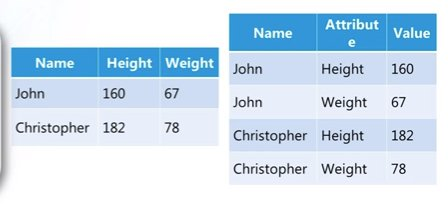

**Wide format** is where we have a single row for every data point with multiple columns to hold the values of various attributes.

**Long format** is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

In [ ]:
df = pd.DataFrame({"cse":[120]})
df

,cse
0,120


In [ ]:
# melt -> simple example of branch 
# wide to long
df.melt()

,variable,value
0,cse,120


In [ ]:
# melt -> branch with year
df = pd.DataFrame({"cse": [120], "ece": [100], "mech": [50]})
df

,cse,ece,mech
0,120,100,50


In [ ]:
df.melt()

,variable,value
0,cse,120
1,ece,100
2,mech,50


In [ ]:
df.melt(var_name="branch", value_name="num_students")

,branch,num_students
0,cse,120
1,ece,100
2,mech,50


In [ ]:
df = pd.DataFrame(
    {
        "branch": ["cse", "ece", "mech"],
        2020: [100, 150, 60],
        2021: [120, 130, 80],
        2022: [150, 140, 70]
    }
)
df

,branch,2020,2021,2022
0,cse,100,120,150
1,ece,150,130,140
2,mech,60,80,70


In [ ]:
df.melt()

,variable,value
0,branch,cse
1,branch,ece
2,branch,mech
3,2020,100
4,2020,150
5,2020,60
6,2021,120
7,2021,130
8,2021,80
9,2022,150


In [ ]:
df.melt(id_vars=["branch"],var_name="year",value_name="students")

,branch,year,students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [ ]:
# melt -> real world example
death = pd.read_csv(r"TheData\time_series_covid19_deaths_global.csv")
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [ ]:
confirm = pd.read_csv(r"TheData\time_series_covid19_confirmed_global.csv")
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [ ]:
deathMlt= death.melt(id_vars=["Province/State","Country/Region","Lat","Long"],var_name="Date",value_name="Deaths")
deathMlt

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,4024


In [ ]:
cnfMlt= confirm.melt(id_vars=["Province/State","Country/Region","Lat","Long"],var_name="Date",value_name="Confirm_Case")
cnfMlt

,Province/State,Country/Region,Lat,Long,Date,Confirm_Case
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661


In [ ]:
pd.merge(cnfMlt, deathMlt, on=["Province/State",
         "Country/Region",	"Lat",	"Long",	"Date"])[["Country/Region", "Date", "Confirm_Case", "Deaths"]]


,Country/Region,Date,Confirm_Case,Deaths
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


### Pivot Table

The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [16]:
df = pd.read_csv(r"TheData\tips.csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [20]:
df.groupby("sex")[["total_bill"]].mean()

,total_bill
sex,
Female,18.056897
Male,20.744076


In [24]:
df.groupby(["sex","smoker"])[["total_bill"]].mean()

total_bill
sex    smoker            
Female No       18.105185
       Yes      17.977879
Male   No       19.791237
       Yes      22.284500

In [26]:
df.groupby(["sex","smoker"])[["total_bill"]].mean().unstack()

total_bill           
smoker         No        Yes
sex                         
Female  18.105185  17.977879
Male    19.791237  22.284500

In [29]:
df.pivot_table(index="sex",columns="smoker",values="total_bill")

smoker,No,Yes
sex,,
Female,18.105185,17.977879
Male,19.791237,22.284500


In [31]:
# aggfunc
df.pivot_table(index="sex",columns="smoker",values="total_bill",aggfunc="sum")

smoker,No,Yes
sex,,
Female,977.68,593.27
Male,1919.75,1337.07


In [33]:
df.pivot_table(index="sex",columns="smoker",values="total_bill",aggfunc="count")

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [35]:
# all cols together
df.pivot_table(index="sex",columns="smoker")

C:\Users\Kr. SOURAV\AppData\Local\Temp\ipykernel_14200\2418636396.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index="sex",columns="smoker")


size                 tip           total_bill           
smoker        No       Yes        No       Yes         No        Yes
sex                                                                 
Female  2.592593  2.242424  2.773519  2.931515  18.105185  17.977879
Male    2.711340  2.500000  3.113402  3.051167  19.791237  22.284500

In [37]:
df.pivot_table(index="sex",columns="smoker")["tip"]

C:\Users\Kr. SOURAV\AppData\Local\Temp\ipykernel_14200\3835036751.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index="sex",columns="smoker")["tip"]


smoker,No,Yes
sex,,
Female,2.773519,2.931515
Male,3.113402,3.051167


In [39]:
# multidimentional
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [41]:
df.pivot_table(index=["sex", "smoker"], columns=["day", "time"],values="total_bill")


day               Fri                   Sat        Sun   Thur           
time           Dinner      Lunch     Dinner     Dinner Dinner      Lunch
sex    smoker                                                           
Female No      22.750  15.980000  19.003846  20.824286  18.78  15.899167
       Yes     12.200  13.260000  20.266667  16.540000    NaN  19.218571
Male   No      17.475        NaN  19.929063  20.403256    NaN  18.486500
       Yes     25.892  11.386667  21.837778  26.141333    NaN  19.171000

In [44]:
df.pivot_table(index=["sex", "smoker"], columns=["day", "time"],aggfunc={"size":"mean","tip":"max","total_bill":"sum"})

size                                                   tip  \
day              Fri                 Sat       Sun   Thur              Fri   
time          Dinner     Lunch    Dinner    Dinner Dinner     Lunch Dinner   
sex    smoker                                                                
Female No        2.0  3.000000  2.307692  3.071429    2.0  2.500000   3.25   
       Yes       2.0  2.000000  2.200000  2.500000    NaN  2.428571   4.30   
Male   No        2.0       NaN  2.656250  2.883721    NaN  2.500000   3.50   
       Yes       2.4  1.666667  2.629630  2.600000    NaN  2.300000   4.73   

                                               total_bill                 \
day                    Sat    Sun   Thur              Fri            Sat   
time          Lunch Dinner Dinner Dinner Lunch     Dinner  Lunch  Dinner   
sex    smoker                                                              
Female No      3.00   4.67    5.2    3.0  5.17      22.75  15.98  247.05   
       Yes     3.48   6.50    4.0    NaN  5.00      48.80  39.78  304.00   
Male   No       NaN   9.00    6.0    NaN  6.70      34.95    NaN  637.73   
       Yes     2.20  10.00    6.5    NaN  5.00     129.46  34.16  589.62   

                                      
day               Sun   Thur          
time           Dinner Dinner   Lunch  
sex    smoker                         
Female No      291.54  18.78  381.58  
       Yes      66.16    NaN  134.53  
Male   No      877.34    NaN  369.73  
       Yes     392.12    NaN  191.71

In [46]:
# margins
df.pivot_table(index="sex", columns="smoker",
               values="total_bill", aggfunc="sum", margins=True)


smoker,No,Yes,All
sex,,,
Female,977.68,593.27,1570.95
Male,1919.75,1337.07,3256.82
All,2897.43,1930.34,4827.77


In [49]:
# ploting graphs
df = pd.read_csv("TheData\expense_data.csv")
df

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [55]:
df["Category"].value_counts()

Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: Category, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [61]:
df["Date"] = pd.to_datetime(df["Date"])


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [70]:
df["Month"] = df["Date"].dt.month_name()


In [76]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [83]:
df.pivot_table(index="Month",columns="Category",values="INR",aggfunc="sum")

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
Month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,NaN,6440.72,NaN,4800.0,1790.0,NaN,NaN,400.0,513.72,914.0
February,NaN,798.0,NaN,NaN,5579.85,NaN,2808.0,20000.0,NaN,NaN,NaN,1800.00,5078.8
January,1000.0,NaN,NaN,1400.0,9112.51,NaN,4580.0,13178.0,NaN,8000.0,NaN,200.00,2850.0
March,NaN,NaN,NaN,NaN,195.00,NaN,NaN,900.0,NaN,NaN,NaN,NaN,30.0
November,2000.0,NaN,NaN,NaN,3174.40,115.0,NaN,2000.0,3.0,NaN,NaN,NaN,331.0


In [86]:
df.pivot_table(index="Month",columns="Category",values="INR",aggfunc="sum",fill_value=0)

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
Month,,,,,,,,,,,,,
December,11000,2590,196,0,6440.72,0,4800,1790,0,0,400,513.72,914.0
February,0,798,0,0,5579.85,0,2808,20000,0,0,0,1800.00,5078.8
January,1000,0,0,1400,9112.51,0,4580,13178,0,8000,0,200.00,2850.0
March,0,0,0,0,195.00,0,0,900,0,0,0,0.00,30.0
November,2000,0,0,0,3174.40,115,0,2000,3,0,0,0.00,331.0


<AxesSubplot: xlabel='Month'>

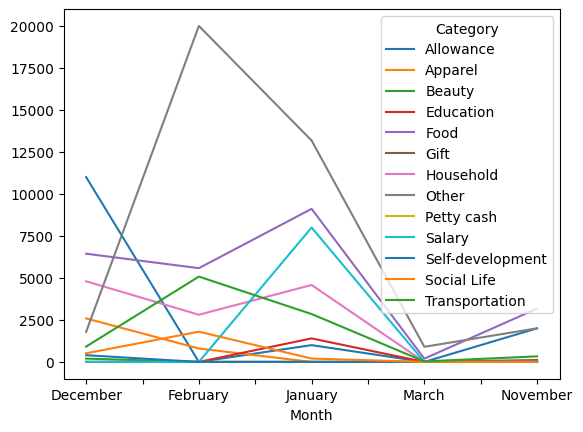

In [87]:
df.pivot_table(index="Month",columns="Category",values="INR",aggfunc="sum",fill_value=0).plot()

<AxesSubplot: xlabel='Month'>

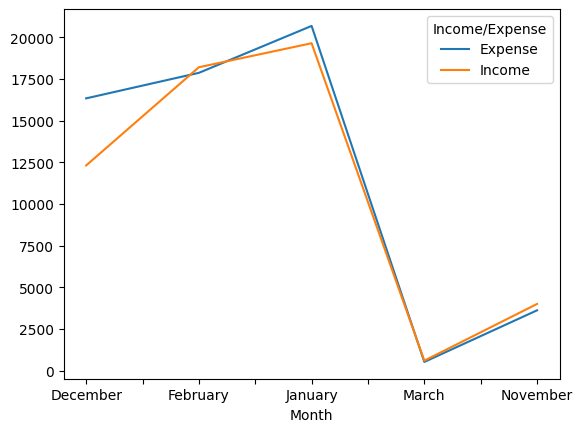

In [90]:
df.pivot_table(index="Month",columns="Income/Expense",values="INR",aggfunc="sum",fill_value=0).plot()

<AxesSubplot: xlabel='Month'>

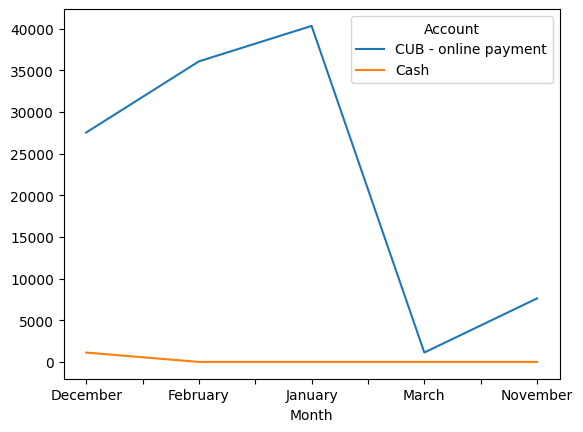

In [91]:
df.pivot_table(index="Month",columns="Account",values="INR",aggfunc="sum",fill_value=0).plot()

# End